#### Functions (IGNORE)

In [1]:
import yfinance as yf
missing_data_tickers = [] # use this as a list of tickers with missing data

def get_data_from_start_to_end(ticker, start_date, end_date):
    global missing_data_tickers  # Use the global list to accumulate missing tickers
    try:
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        if stock_data.empty:
            missing_data_tickers.append(ticker)
            raise ValueError(f"Stock data for ticker {ticker} during the period from {start_date} to {end_date} was not found.")
        return stock_data
    except Exception as e:
        print(f"An error occurred for ticker {ticker}: {e}")
        missing_data_tickers.append(ticker)
        return None


In [2]:
# for a variety of periods load in different list of tickers
def download_stock_data_for_periods(tickers, periods):
    all_data = {}
    
    for period, (start_date, end_date) in periods.items():
        period_data = {}
        for ticker in tickers:
            data = get_data_from_start_to_end(ticker, start_date, end_date)
            if data is not None:
                period_data[ticker] = data
        all_data[period] = period_data
    
    return all_data

In [3]:
import pandas as pd

# Get the adjusted close prices
adj_close_sector_etf = {}

# Create adjusted close price only listing of sector ETFs
def get_adjusted_closed_price(nested_dict, tickers, periods):
    for period in periods:
        stock_price_df = pd.DataFrame()  # Create a new DataFrame for each period
        for ticker in tickers:
            stock_price_df[ticker] = nested_dict[period][ticker]['Adj Close']
        
        adj_close_sector_etf[period] = stock_price_df  # Store the complete DataFrame for the period
    
    return adj_close_sector_etf

In [4]:
import random

def stochastic_modeling(nested_dict, tickers, periods,num_samples):
    # Store the returns in a nested dictionary
    nested_dict_returns = {period: {ticker: [] for ticker in tickers} for period in periods}

    # Go through each economic time period
    for period in periods:
        max_index = len(nested_dict[period]) - 150  # Ensure there's enough data to calculate ROI

        # Generate random samples from the valid range
        random_dates = random.choices(range(max_index), k=num_samples)

        for ticker in tickers:
            for date_idx in random_dates:
                start_price = nested_dict[period][ticker].iloc[date_idx]
                end_price = nested_dict[period][ticker].iloc[date_idx + 150]

                # Get the return by the Holding Period Return
                roi = (((end_price - start_price) / start_price) * 100)

                nested_dict_returns[period][ticker].append(roi)

    return nested_dict_returns  # Return the nested dictionary with returns

In [5]:
def stochastic_roi(tickers,periods,return_rates_list,analysis_type):
    df = pd.DataFrame(index=tickers,columns=periods)
    for period in periods:
        for ticker in tickers:
            data = pd.Series(return_rates_list[period][ticker])
            if analysis_type=='Mean':
                df.at[ticker,period] = data.mean()
            elif analysis_type=='Median':
                df.at[ticker,period] = data.median()
            elif analysis_type=='Std':
                df.at[ticker,period] = data.std()
            elif analysis_type=='Variance':
                df.at[ticker,period] = data.var()

    return df

# Technical Analysis Investment Strategy

In [6]:
# import packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# create time periods for where this takes place
economic_cycle_periods = {

    "trough": ("2008-10-01", "2009-06-01"),
    "expansion": ("2012-01-01", "2015-01-01"),
    "peak": ("2019-06-01", "2020-02-01"),
    "contraction": ("2007-12-01", "2008-10-01"),
}

economic_cycle_periods_list = ['trough','expansion','peak','contraction']

In [8]:
# create etf tickers for sectors
sector_etf_tickers = [
    'XLB', # materials sector
    'XLI', # industrials sector
    'XLF', # financials
    'XLK', # information technology
    'XLY', # consumer discretionary
    'XLP', # consumer staples
    'XLE', # energy
    'XLV', # healthcare
    'VOX', # communication services
    'XLU', # utilities
    'IYR' # real estate
    ]

## Buy and Hold Investment Technique
The buy and hold strategy is a passive investing strategy that will be applied to the 11 sector ETFs during different macroeconomic time periods.

In [9]:
# save nested dictionary data as a variable to be accessed.
sector_etf_data = download_stock_data_for_periods(sector_etf_tickers,economic_cycle_periods)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [10]:
# get adjusted close price
sector_etf_adjusted_close = get_adjusted_closed_price(sector_etf_data,sector_etf_tickers,economic_cycle_periods_list)

### Perform stochastic modeling using buy and hold strategy
Use a different day where the stock begins investing then hold for a month and see the return.

In [11]:
# perform stochastic modeling on the buy and 
stochastic_buy_hold = stochastic_modeling(sector_etf_adjusted_close,sector_etf_tickers,economic_cycle_periods_list,10000)

In [12]:
# this can be repeated for mean, median, std and var
stochastic_roi(sector_etf_tickers,economic_cycle_periods_list,stochastic_buy_hold,'Mean')

,trough,expansion,peak,contraction
XLB,-1.571454,9.827548,5.628338,-4.467424
XLI,-10.735716,12.340104,11.187493,-8.636963
XLF,-24.672899,13.57966,14.482195,-24.881517
XLK,1.923683,9.940579,26.457087,-9.171734
XLY,0.621173,12.923213,8.903494,-7.659424
XLP,-7.392183,9.777941,10.453769,0.796046
XLE,0.890207,8.411514,-0.796849,-2.255453
XLV,-5.085795,15.991887,14.273524,-7.006893
VOX,8.873121,9.645647,14.807485,-13.786082
XLU,-6.139538,7.678971,13.043227,-9.158882


## Bollinger Bands Investment Technique
Using John Bollinger's techniques 'Bollinger Bands' to create buy and sell signals to observe the roi for investing for a month.

In [13]:
# add bollinger data
import scipy.stats as stats
def add_bollinger_data(data,window,conf_int):
        z_score = stats.norm.ppf(1 - (1 - conf_int) / 2) # create a zscore from the mean

        data['middle_band'] = data['Adj Close'].rolling(window).mean()
        data['upper_band'] = data['middle_band'] + z_score * data['Adj Close'].rolling(window).std()
        data['lower_band'] = data['middle_band'] - z_score * data['Adj Close'].rolling(window).std()

        data['Signal'] = None

        data['Signal'] = np.where(data['Adj Close'] < data['lower_band'], 'Buy', 
                              np.where(data['Adj Close'] > data['upper_band'], 'Sell', np.nan))

        return data

In [14]:
# create bollinger data for multiple time period and multiple tickers
def bollinger_data_multiple_periods_tickers(periods,tickers,data,window,confidence_period):
    # for each ticker in economic time periods
    for period in periods:
            for ticker in tickers:
                    try:
                        add_bollinger_data(data[period][ticker],window,confidence_period)
                    except KeyError:
                        print(f'Data for {ticker} does not exist during {period}')

In [15]:
# create bollinger bands in stock data
bollinger_data_multiple_periods_tickers(economic_cycle_periods_list,sector_etf_tickers,sector_etf_data,20,0.95)
sector_etf_data['trough']['XLB']

,Open,High,Low,Close,Adj Close,Volume,middle_band,upper_band,lower_band,Signal
Date,,,,,,,,,,
2008-10-01,32.759998,33.189999,32.130001,32.849998,23.119267,14639500,NaN,NaN,NaN,nan
2008-10-02,31.540001,31.860001,29.930000,30.490000,21.458340,12581300,NaN,NaN,NaN,nan
2008-10-03,30.190001,31.690001,29.780001,30.190001,21.247194,16770600,NaN,NaN,NaN,nan
2008-10-06,29.510000,29.510000,26.889999,28.700001,20.198572,22512700,NaN,NaN,NaN,nan
2008-10-07,29.160000,29.530001,27.049999,27.219999,19.156971,16004900,NaN,NaN,NaN,nan
...,...,...,...,...,...,...,...,...,...,...
2009-05-22,26.530001,26.660000,26.110001,26.299999,18.848717,8421500,18.742288,19.907895,17.576681,nan
2009-05-26,26.170000,26.969999,25.830000,26.930000,19.300224,7886900,18.827573,19.888620,17.766527,nan
2009-05-27,26.790001,26.850000,25.860001,25.920000,18.576374,7216600,18.881324,19.759552,18.003096,nan


In [16]:
# example case of bollinger bands in stock data
sector_etf_data['expansion']['XLB']['Signal'].value_counts()

nan     670
Buy      45
Sell     39
Name: Signal, dtype: int64

In [17]:
def collect_signals(nested_dict, periods, tickers):
    # Initialize an empty dictionary to hold DataFrames for each period
    bb_nested_dict = {}

    for period in periods:
        # Create a DataFrame for each period with the tickers as columns
        signals_period = pd.DataFrame(columns=tickers)
        
        # Loop through each ticker and extract the 'Signal'
        for ticker in tickers:
            signals_period[ticker] = nested_dict[period][ticker]['Signal']
        
        # Store the DataFrame in the dictionary using the period as the key
        bb_nested_dict[period] = signals_period

    # Return the dictionary containing DataFrames for each period
    return bb_nested_dict

In [18]:
bb_bands_signals = collect_signals(sector_etf_data,economic_cycle_periods_list,sector_etf_tickers)
bb_bands_signals['trough']

,XLB,XLI,XLF,XLK,XLY,XLP,XLE,XLV,VOX,XLU,IYR
Date,,,,,,,,,,,
2008-10-01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2008-10-07,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...
2009-05-22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-05-26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2009-05-27,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [237]:
import pandas as pd
import numpy as np
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def bb_band_roi(bb_signals_nd, adj_close_nd, periods_date, periods_list, tickers, n_sample, initial_investment, percent_to_buy, percent_to_sell):

    # Track actions day by day
    portfolio_tracker = {period: pd.DataFrame(columns=['Date', 'Account Balance', 'Portfolio Value', 'Total Value', 'Profit']) for period in periods_list}

    # Portfolio summary - nested dictionary for each period and ticker
    portfolio_summary = {period: {ticker: pd.DataFrame() for ticker in tickers} for period in periods_list}
    
    # Set data to be accessed
    adj_close_data = adj_close_nd
    bollinger_band_data = bb_signals_nd

    all_data = {
        'Stock Tracker': portfolio_summary,
        'Portfolio Tracker': portfolio_tracker,
        'Adjusted Close Price': adj_close_nd,
        'Bollinger Band Signal':bollinger_band_data
    }

    # Loop through each economic period
    for period in periods_list:

        # Create the date range for the current period
        date_range = pd.date_range(start=pd.to_datetime(periods_date[period][0]), end=pd.to_datetime(periods_date[period][1]) - timedelta(days=90))
        
        # Get random dates for stochastic modeling
        start_dates = np.random.choice(date_range, size=n_sample, replace=False)

        # Loop through sampled start dates
        for start_date in start_dates:
            time_stamp = pd.to_datetime(start_date)

            # Initialize balance for portfolio investment   
            account_balance = initial_investment
            portfolio_value = 0
            shares_number = {ticker: 0 for ticker in tickers}  # Initialize share count for each ticker
            shares_value = {ticker: 0 for ticker in tickers}   # Initialize share value for each ticker

            # Extract the adjusted close and signal data for time period
            adj_close_period = adj_close_data[period].loc[time_stamp:time_stamp + timedelta(days=90)]
            bb_signals_period = bollinger_band_data[period].loc[time_stamp:time_stamp + timedelta(days=90)]

            # Iterate over each row in the Bollinger Band signals (day by day)
            for row_idx, row in bb_signals_period.iterrows():
                daily_balance_change = 0
                daily_portfolio_value = 0
                
                for col_idx, signal in enumerate(row):
                    ticker = tickers[col_idx]  # Correctly get ticker for each column
                    adj_close_price = adj_close_period.loc[row_idx, ticker]  # Get corresponding adjusted close price

                    # initialize the tracking of stocks for current ticker
                    stock_tracker = all_data['Stock Tracker'][period][ticker]

                    # Handle Buy action
                    if signal == 'Buy':
                        amount_to_buy = percent_to_buy * account_balance
                        if account_balance >= amount_to_buy:
                            # Calculate shares to buy
                            shares_to_buy = amount_to_buy / adj_close_price
                            shares_number[ticker] += shares_to_buy
                            shares_value[ticker] = shares_number[ticker] * adj_close_price

                            # Track investment for the current period
                            stock_tracker = stock_tracker.append({
                                'Date': row_idx,
                                'Share Price': adj_close_price,
                                'Signal': 'Buy',
                                'Buy/Sell Amount ($)': amount_to_buy,
                                'Buy/Sell Number of Shares': shares_to_buy,
                                'Shares ($) Ownership': shares_value[ticker],
                                'Shares Ownership': shares_number[ticker]
                            }, ignore_index=True)

                            # Update account balance after buying
                            account_balance -= amount_to_buy

                    # Handle Sell action
                    elif signal == 'Sell':
                        amount_to_sell = percent_to_sell * shares_value[ticker]
                        if shares_value[ticker] >= amount_to_sell:
                            # Calculate shares to sell
                            shares_to_sell = amount_to_sell / adj_close_price
                            shares_number[ticker] -= shares_to_sell
                            shares_value[ticker] = shares_number[ticker] * adj_close_price

                            # Track the sell action
                            stock_tracker = stock_tracker.append({
                                'Date': row_idx,
                                'Share Price': adj_close_price,
                                'Signal': 'Sell',
                                'Buy/Sell Amount ($)': amount_to_sell,
                                'Buy/Sell Number of Shares': shares_to_sell,
                                'Shares ($) Ownership': shares_value[ticker],
                                'Shares Ownership': shares_number[ticker]
                            }, ignore_index=True)

                            # Update account balance after selling
                            account_balance += amount_to_sell

                    # Handle Hold action (no action taken)
                    else:
                        # Track the hold state
                        stock_tracker = stock_tracker.append({
                            'Date': row_idx,
                            'Share Price': adj_close_price,
                            'Signal': 'Hold',
                            'Buy/Sell Amount ($)': 0,
                            'Buy/Sell Number of Shares': 0,
                            'Shares ($) Ownership': shares_value[ticker],
                            'Shares Ownership': shares_number[ticker]
                        }, ignore_index=True)

                    # Save the updated tracker back to portfolio summary
                    all_data['Stock Tracker'][period][ticker] = stock_tracker.copy()

                for ticker in tickers:
                    shares_value[ticker] = shares_number[ticker] * adj_close_period.loc[row_idx, ticker]

                # Calculate total portfolio value for all tickers for the day
                portfolio_value = sum(shares_value.values())

                # Total value (account balance + portfolio value)
                total_value = account_balance + portfolio_value

                # Calculate profit (difference from initial investment)
                profit = total_value - initial_investment

                # Calculate the percentage of investment for each ticker
                # Ensure that division by zero doesn't occur when portfolio_value is 0
                if portfolio_value != 0:
                    percentage_invested = {ticker: (shares_value[ticker] / portfolio_value) * 100 for ticker in tickers}
                else:
                    percentage_invested = {ticker: 0 for ticker in tickers}


                # Track portfolio changes for the current day
                portfolio_tracker[period] = portfolio_tracker[period].append({
                    'Date': row_idx,
                    'Account Balance': account_balance,
                    'Portfolio Value': portfolio_value,
                    'Total Value': total_value,
                    'Profit': profit,
                    'Percentage Invested':percentage_invested
                }, ignore_index=True)

            # Update the portfolio tracker for the period
            all_data['Portfolio Tracker'][period] = portfolio_tracker[period]

    # Return the complete portfolio summary for all periods and tickers
    return all_data


stock_tracking = bb_band_roi(bb_bands_signals,adj_close_sector_etf,economic_cycle_periods,economic_cycle_periods_list,sector_etf_tickers,1,1000,0.025,0.025)

In [238]:
stock_tracking['Portfolio Tracker']['contraction']

,Date,Account Balance,Portfolio Value,Total Value,Profit,Percentage Invested
0,2008-06-02,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
1,2008-06-03,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
2,2008-06-04,1000,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
3,2008-06-05,1000.0,0.000000,1000.000000,0.000000,"{'XLB': 0, 'XLI': 0, 'XLF': 0, 'XLK': 0, 'XLY'..."
4,2008-06-06,950.625,49.375000,1000.000000,0.000000,"{'XLB': 0.0, 'XLI': 50.63291139240506, 'XLF': ..."
...,...,...,...,...,...,...
59,2008-08-25,317.741035,665.187101,982.928136,-17.071864,"{'XLB': 13.412898542381807, 'XLI': 10.54201105..."
60,2008-08-26,317.741035,668.459711,986.200747,-13.799253,"{'XLB': 13.419307328420881, 'XLI': 10.48738225..."
61,2008-08-27,317.741035,674.671040,992.412075,-7.587925,"{'XLB': 13.418173778836243, 'XLI': 10.42074548..."
62,2008-08-28,319.168355,684.219494,1003.387850,3.387850,"{'XLB': 13.41869058396806, 'XLI': 10.505434188..."


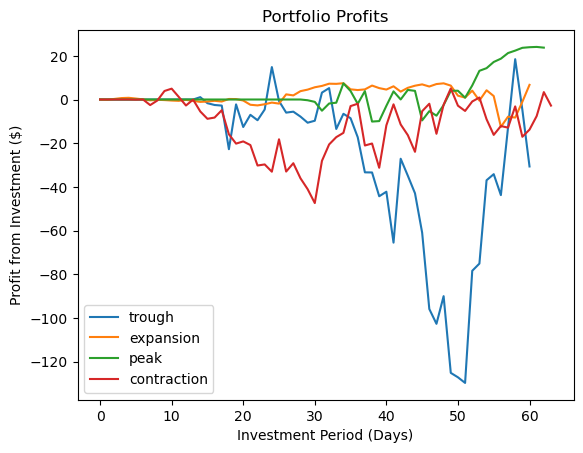

In [239]:
# compare the different profits 
for period in economic_cycle_periods_list:
    plt.plot(stock_tracking['Portfolio Tracker'][period]['Profit'],label=f'{period}')
plt.title('Portfolio Profits')
plt.xlabel('Investment Period (Days)')
plt.ylabel('Profit from Investment ($)')
plt.legend()
plt.show()

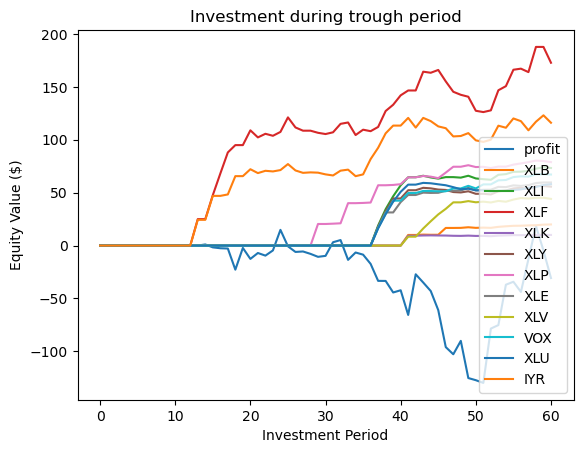

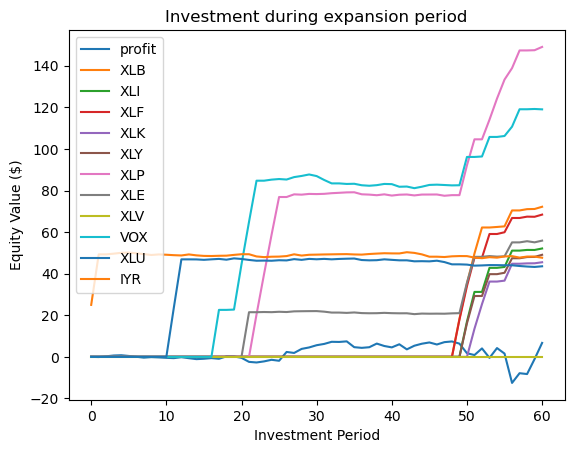

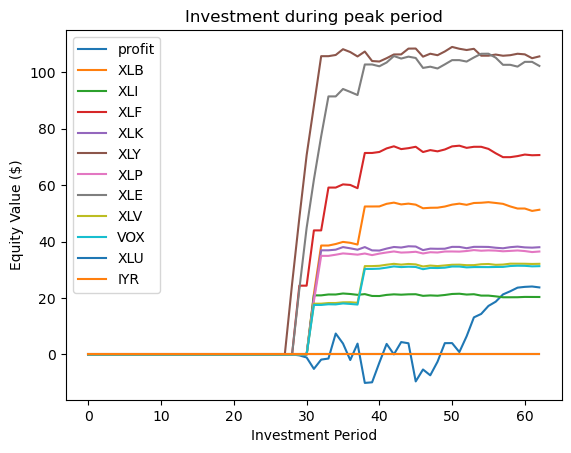

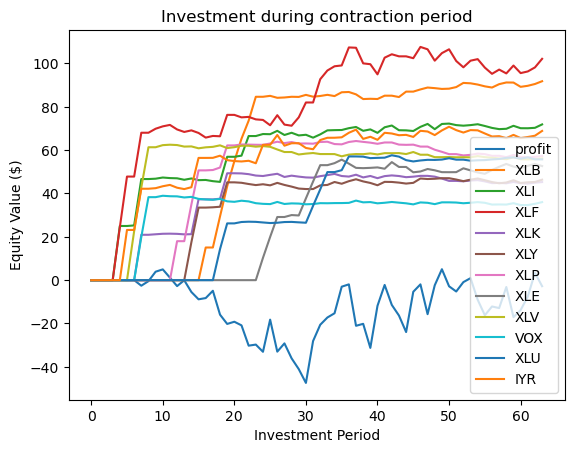

In [240]:
# compare the different sector make up

for period in economic_cycle_periods_list:
    plt.plot(stock_tracking['Portfolio Tracker'][period]['Profit'],label='profit')
    for ticker in sector_etf_tickers:
        plt.plot(stock_tracking['Stock Tracker'][period][ticker]['Shares ($) Ownership'],label=f'{ticker}')
    plt.title(f'Investment during {period} period')
    plt.xlabel('Investment Period')
    plt.ylabel('Equity Value ($)')
    plt.legend()
    plt.show()

In [ ]:
# create a function that is only going to look at the final day of the stocks performance

In [272]:
import pandas as pd
import numpy as np
from datetime import timedelta

def calculate_stock_roi(bb_signals_nd, adj_close_nd, periods_date, periods_list, tickers, n_sample, initial_investment, percent_to_buy, percent_to_sell):
    # Initialize a nested dictionary to store ROI percentages for each period and ticker
    roi_results = {period: {ticker: [] for ticker in tickers} for period in periods_list}

    # Loop through each economic period
    for period in periods_list:
        # Create the date range for the current period
        date_range = pd.date_range(start=pd.to_datetime(periods_date[period][0]), end=pd.to_datetime(periods_date[period][1]) - timedelta(days=100))
        
        # Get random dates for stochastic modeling
        start_dates = np.random.choice(date_range, size=n_sample, replace=True)

        # Loop through sampled start dates
        for start_date in start_dates:
            time_stamp = pd.to_datetime(start_date)

            # Initialize variables
            account_balance = initial_investment
            shares_number = {ticker: 0 for ticker in tickers}  # Initialize share count for each ticker
            shares_value = {ticker: 0 for ticker in tickers}   # Initialize share value for each ticker

            # Extract the adjusted close and signal data for time period
            adj_close_period = adj_close_nd[period].loc[time_stamp:time_stamp + timedelta(days=100)]
            bb_signals_period = bb_signals_nd[period].loc[time_stamp:time_stamp + timedelta(days=100)]

            # Iterate over each row in the Bollinger Band signals (day by day)
            for row_idx, row in bb_signals_period.iterrows():
                for col_idx, signal in enumerate(row):
                    ticker = tickers[col_idx]  # Correctly get ticker for each column
                    adj_close_price = adj_close_period.loc[row_idx, ticker]  # Get corresponding adjusted close price

                    # Handle Buy action
                    if signal == 'Buy':
                        amount_to_buy = percent_to_buy * account_balance
                        if account_balance >= amount_to_buy:
                            shares_to_buy = amount_to_buy / adj_close_price
                            shares_number[ticker] += shares_to_buy
                            account_balance -= amount_to_buy

                    # Handle Sell action
                    elif signal == 'Sell':
                        if shares_number[ticker] > 0:
                            shares_value[ticker] = shares_number[ticker] * adj_close_price
                            amount_to_sell = percent_to_sell * shares_value[ticker]
                            if shares_value[ticker] >= amount_to_sell:
                                shares_to_sell = amount_to_sell / adj_close_price
                                shares_number[ticker] -= shares_to_sell
                                account_balance += amount_to_sell

            # Calculate total portfolio value at the end of the period
            portfolio_value = sum(shares_number[ticker] * adj_close_period.iloc[-1][ticker] for ticker in tickers)
            total_value = account_balance + portfolio_value
            
            # Calculate the profit relative to the initial investment
            profit = total_value - initial_investment
            
            # Calculate ROI for each stock as a percentage of the initial investment
            for ticker in tickers:
                if shares_number[ticker] > 0:  # Only consider tickers with shares owned
                    roi_dollar_value = shares_value[ticker] - (initial_investment * (percent_to_buy * shares_number[ticker]))

                else:
                    roi = 0

                # Store ROI in the results dictionary
                roi_results[period][ticker].append(roi_dollar_value)

    return roi_results,profit,portfolio_value,total_value

# Example usage
roi_tracking = calculate_stock_roi(bb_bands_signals, adj_close_sector_etf, economic_cycle_periods, economic_cycle_periods_list, sector_etf_tickers, 1000, 1000, 0.001, 0.01)

# This will give you the ROI results structured as [period][ticker]

In [274]:
stochastic_roi(sector_etf_tickers,economic_cycle_periods_list,roi_tracking[0],'Std')

,trough,expansion,peak,contraction
XLB,1.246044,2.655686,1.316698,2.578743
XLI,2.663288,2.6408,1.141668,0.067811
XLF,5.016508,2.005716,1.400342,1.747026
XLK,0.391855,2.416228,0.939204,1.279095
XLY,1.664502,2.151762,1.377885,1.410747
XLP,2.009401,2.233778,1.898969,1.695969
XLE,2.266872,2.394617,2.292936,1.948503
XLV,2.430967,1.645123,0.943712,2.400867
VOX,2.84293,2.524429,0.787145,1.825611
XLU,1.785454,2.520736,1.498241,2.445888
